<a href="https://colab.research.google.com/github/wiillytom/derivatives_projects/blob/main/graph_greeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')  # modern grid + soft colors
class Option:
    ### Option Class to compute the value of vanilla Put and Call European Options
    def __init__(self,S,K,T,sig,r):

        self.S = S
        self.K = K
        self.T = T
        self.sig = sig
        self.r = r

    def d1(self):
        return (np.log(self.S/self.K)+(self.r+(self.sig**2)/2)*self.T)/(self.sig*np.sqrt(self.T))

    def d2(self):
        return self.d1() - self.sig*np.sqrt(self.T)

    def call_price(self):
        return self.S*norm.cdf(self.d1()) - self.K*np.exp(-self.r*self.T)*norm.cdf(self.d2())

    def put_price(self):
        return self.K*np.exp(-self.r*self.T)*norm.cdf(-self.d2()) - self.S*norm.cdf(-self.d1())

    # Greek Section
    #1. Delta
    def call_delta(self):
        return norm.cdf(self.d1())

    def put_delta(self):
        return -norm.cdf(-self.d2())
    #2. Gamma (Gamma put = gamma call)
    def gamma_option(self):
      return norm.pdf(self.d1())/(self.S*self.sig*np.sqrt(self.T))

    #3. Vega
    def vega_option(self):
      return self.S*np.sqrt(self.T)*norm.pdf(self.d1())

    #4. Theta
    def call_theta(self):
      return -self.S*self.sig*norm.pdf(self.d1())/(2*np.sqrt(self.T)) - self.r*self.K*np.exp(-self.r*self.T)*norm.cdf(self.d2)

    def put_theta(self):
      return -self.S*self.sig*norm.cdf(self.d1())/(2*np.sqrt(self.T)) + self.r*self.K*np.exp(-self.r*self.T)*norm.cdf(-self.d2())

    #5 Rho
    def call_rho(self):
      return (self.K*self.T*np.exp(-self.r*self.T)*norm.cdf(self.d2()))

    def put_rho(self):
      return self.K*self.T*np.exp(-self.r*self.T)*(norm.cdf(self.d2())-1)


first_try = Option(100, 100, 0.25, 0.2, 0.03)

first_try.call_delta()

np.float64(0.5497382248301129)

In [56]:
class GreekGraph(Option):
  def graph_call_delta(self):
        S = np.linspace(0.8*self.S, 1.2*self.S, 100)
        delta = []
        for s in S:
          opt = Option(s, self.K, self.T, self.sig, self.r)
          delta.append(opt.call_delta())
        plt.plot(S, delta, linewidth=1, color='royalblue')
        plt.title("Call Delta", fontsize=16, fontweight='bold')
        plt.xlabel("Spot Price", fontsize=12)
        plt.ylabel("Delta", fontsize=12)
        plt.grid(alpha=1)
  def graph

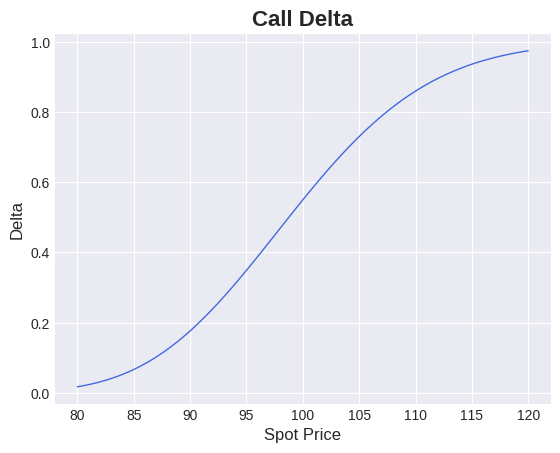

In [57]:
delta_plot = GreekGraph(100, 100, 0.25, 0.2, 0.03)
delta_plot.graph_call_delta()